## Урок 4. Метод опорных векторов на практике
Выполните все пункты задания по ссылке.

Краткое описание: в этом задании вам нужно будет обучить несколько моделей и сделать важные выводы. Более подробная информация — в блокноте.

Наборы данных: TestData.csv и TrainData.csv.

In [21]:
path_train = "TrainData.csv"

In [22]:
path_test = "TestData.csv"

In [6]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.ensemble import BalancedRandomForestClassifier
#from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
from IPython.display import display, HTML
display(HTML("<style>:root { --jp-notebook-max-width: 100% !important; }</style>"))

In [8]:
def analyze_df(df):
    # Количество строк и столбцов
    rows_count, columns_count = df.shape
    print('Количество столбцов:', columns_count)
    print('Количество строк:', rows_count)

    # Первые 5 строк
    display(df.head(5))

    # Статистическое описание
    display(df.describe())

    # Информация о данных
    df.info()

    # Типы данных
    print("\nТипы данных:")
    print(df.dtypes)

    # Обнаружение дубликатов
    duplicates_count = df.duplicated().sum()
    print('\nКоличество дубликатов:', duplicates_count)

    # Обнаружение пропущенных значений
    missing_values = df.isnull().sum()
    print('\nПропущенные значения (по столбцам):')
    print(missing_values)

    # Общее пропущенных значений
    total_missing = missing_values.sum()
    print('\nОбщее количество пропущенных значений:', total_missing)

    # Уникальные значения
    print('\nУникальные значения (по столбцам):')
    print(df.nunique())

    # Гистограммы для числовых признаков
    if not df.select_dtypes(include=[float, int]).empty:
        df.select_dtypes(include=[float, int]).hist(bins=15, figsize=(15, 10))
        plt.suptitle('Гистограммы числовых признаков')
        plt.show()
    else:
        print("\nНет числовых данных для построения гистограмм.")

    # Матрица корреляции
    numeric_df = df.select_dtypes(include=[float, int])
    if not numeric_df.empty:
        correlation_matrix = numeric_df.corr()
        plt.figure(figsize=(10, 8))
        sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
        plt.title('Матрица корреляции числовых признаков')
        plt.show()
    else:
        print("\nНет числовых данных для построения матрицы корреляции.")

In [20]:
import os
from pathlib import Path
print(os.getcwd())
print(Path.cwd())

/Users/a.rukaff/Python/Python/ML
/Users/a.rukaff/Python/Python/ML


In [25]:
df_train = pd.read_csv(path_train)
df_train

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,target
0,50,218.593930,273536,0.104575,4,0.445026,0.274531,0.444334,5.970149,0.300298,0.0,0,49,0.100000,0
1,32,276.771005,173314,0.224684,11,0.445026,0.439103,0.444334,5.970149,0.300298,0.0,0,60,0.244418,0
2,38,218.593930,28887,0.032491,7,0.445026,0.274531,0.444334,25.606721,0.300298,0.0,0,50,0.244418,0
3,19,218.593930,427862,0.179322,10,0.049127,0.044987,0.009499,25.606721,0.300298,0.0,0,35,0.244418,0
4,44,218.593930,109339,0.032491,7,0.098837,0.115721,0.066581,5.970149,0.113590,0.0,0,46,0.185185,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,48,218.593930,329778,0.171817,9,0.066372,NaN,0.066581,25.606721,0.113590,0.0,0,40,0.244418,0
7496,25,218.593930,104439,0.179322,10,0.049127,0.131370,0.103024,25.606721,0.113590,0.0,0,50,0.244418,0
7497,50,218.593930,162632,0.171817,9,0.445026,0.482222,0.444334,25.606721,0.300298,0.0,0,45,0.244418,0
7498,51,276.771005,174824,0.171817,9,0.049127,0.093897,0.103024,25.606721,0.300298,8614.0,0,40,0.244418,1


Количество столбцов: 15
Количество строк: 7500


,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,target
0,50,218.593930,273536,0.104575,4,0.445026,0.274531,0.444334,5.970149,0.300298,0.0,0,49,0.100000,0
1,32,276.771005,173314,0.224684,11,0.445026,0.439103,0.444334,5.970149,0.300298,0.0,0,60,0.244418,0
2,38,218.593930,28887,0.032491,7,0.445026,0.274531,0.444334,25.606721,0.300298,0.0,0,50,0.244418,0
3,19,218.593930,427862,0.179322,10,0.049127,0.044987,0.009499,25.606721,0.300298,0.0,0,35,0.244418,0
4,44,218.593930,109339,0.032491,7,0.098837,0.115721,0.066581,5.970149,0.113590,0.0,0,46,0.185185,0


,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,target
count,7500.000000,7425.000000,7.500000e+03,7500.000000,7500.000000,7500.000000,5625.000000,7500.000000,7500.000000,7500.000000,7490.000000,7500.000000,7500.000000,7500.000000,7500.000000
mean,38.579600,238.905308,1.903850e+05,0.238933,10.083200,0.238934,0.240556,0.238933,23.893333,0.238933,1068.693992,88.974933,40.670800,0.238955,0.238933
std,13.647719,76.198282,1.058674e+05,0.151738,2.546071,0.190283,0.147371,0.193365,4.451530,0.087708,7430.344770,404.517032,12.330051,0.041685,0.426460
min,17.000000,64.259070,1.930200e+04,0.000029,1.000000,0.049127,0.000000,0.009499,5.970149,0.113590,0.000000,0.000000,1.000000,0.000080,0.000000
25%,28.000000,218.593930,1.180190e+05,0.171817,9.000000,0.049127,0.115721,0.066581,25.606721,0.113590,0.000000,0.000000,40.000000,0.244418,0.000000
50%,37.000000,218.593930,1.795685e+05,0.179322,10.000000,0.098837,0.241573,0.103024,25.606721,0.300298,0.000000,0.000000,40.000000,0.244418,0.000000
75%,47.000000,218.593930,2.394418e+05,0.239316,12.000000,0.445026,0.439103,0.444334,25.606721,0.300298,0.000000,0.000000,45.000000,0.244418,0.000000
max,90.000000,575.396825,1.226583e+06,0.729323,16.000000,0.445026,0.482222,0.484375,25.606721,0.300298,99999.000000,4356.000000,99.000000,0.466666,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      7500 non-null   int64  
 1   f2      7425 non-null   float64
 2   f3      7500 non-null   int64  
 3   f4      7500 non-null   float64
 4   f5      7500 non-null   int64  
 5   f6      7500 non-null   float64
 6   f7      5625 non-null   float64
 7   f8      7500 non-null   float64
 8   f9      7500 non-null   float64
 9   f10     7500 non-null   float64
 10  f11     7490 non-null   float64
 11  f12     7500 non-null   int64  
 12  f13     7500 non-null   int64  
 13  f14     7500 non-null   float64
 14  target  7500 non-null   int64  
dtypes: float64(9), int64(6)
memory usage: 879.0 KB

Типы данных:
f1          int64
f2        float64
f3          int64
f4        float64
f5          int64
f6        float64
f7        float64
f8        float64
f9        float64
f10       float64
f11       float64


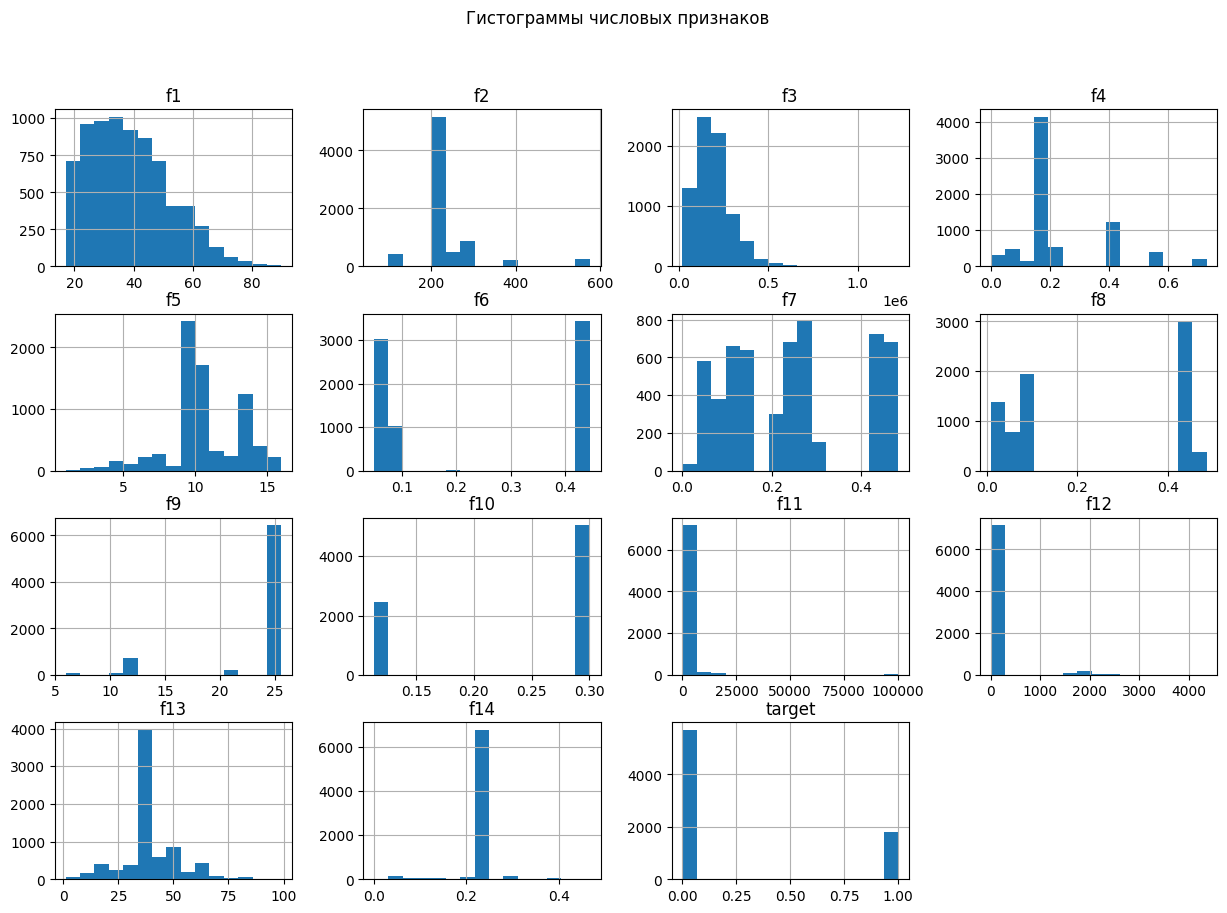

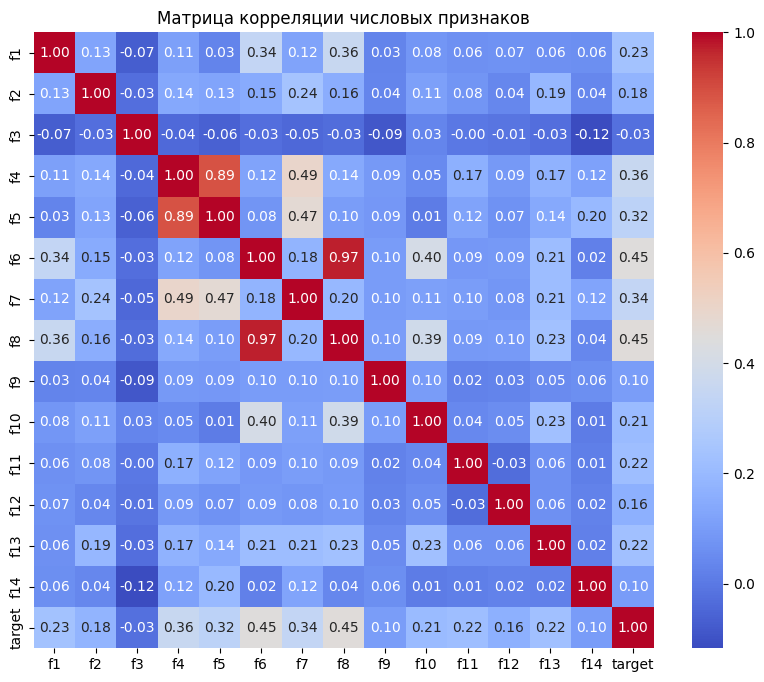

In [26]:
analyze_df(df_train)

In [27]:
df_train.fillna(df_train.median(), inplace=True)

Количество столбцов: 15
Количество строк: 7500


,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,target
0,50,218.593930,273536,0.104575,4,0.445026,0.274531,0.444334,5.970149,0.300298,0.0,0,49,0.100000,0
1,32,276.771005,173314,0.224684,11,0.445026,0.439103,0.444334,5.970149,0.300298,0.0,0,60,0.244418,0
2,38,218.593930,28887,0.032491,7,0.445026,0.274531,0.444334,25.606721,0.300298,0.0,0,50,0.244418,0
3,19,218.593930,427862,0.179322,10,0.049127,0.044987,0.009499,25.606721,0.300298,0.0,0,35,0.244418,0
4,44,218.593930,109339,0.032491,7,0.098837,0.115721,0.066581,5.970149,0.113590,0.0,0,46,0.185185,0


,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,target
count,7500.000000,7500.000000,7.500000e+03,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000
mean,38.579600,238.702194,1.903850e+05,0.238933,10.083200,0.238934,0.240810,0.238933,23.893333,0.238933,1067.269067,88.974933,40.670800,0.238955,0.238933
std,13.647719,75.843216,1.058674e+05,0.151738,2.546071,0.190283,0.127625,0.193365,4.451530,0.087708,7425.491311,404.517032,12.330051,0.041685,0.426460
min,17.000000,64.259070,1.930200e+04,0.000029,1.000000,0.049127,0.000000,0.009499,5.970149,0.113590,0.000000,0.000000,1.000000,0.000080,0.000000
25%,28.000000,218.593930,1.180190e+05,0.171817,9.000000,0.049127,0.131370,0.066581,25.606721,0.113590,0.000000,0.000000,40.000000,0.244418,0.000000
50%,37.000000,218.593930,1.795685e+05,0.179322,10.000000,0.098837,0.241573,0.103024,25.606721,0.300298,0.000000,0.000000,40.000000,0.244418,0.000000
75%,47.000000,218.593930,2.394418e+05,0.239316,12.000000,0.445026,0.274531,0.444334,25.606721,0.300298,0.000000,0.000000,45.000000,0.244418,0.000000
max,90.000000,575.396825,1.226583e+06,0.729323,16.000000,0.445026,0.482222,0.484375,25.606721,0.300298,99999.000000,4356.000000,99.000000,0.466666,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      7500 non-null   int64  
 1   f2      7500 non-null   float64
 2   f3      7500 non-null   int64  
 3   f4      7500 non-null   float64
 4   f5      7500 non-null   int64  
 5   f6      7500 non-null   float64
 6   f7      7500 non-null   float64
 7   f8      7500 non-null   float64
 8   f9      7500 non-null   float64
 9   f10     7500 non-null   float64
 10  f11     7500 non-null   float64
 11  f12     7500 non-null   int64  
 12  f13     7500 non-null   int64  
 13  f14     7500 non-null   float64
 14  target  7500 non-null   int64  
dtypes: float64(9), int64(6)
memory usage: 879.0 KB

Типы данных:
f1          int64
f2        float64
f3          int64
f4        float64
f5          int64
f6        float64
f7        float64
f8        float64
f9        float64
f10       float64
f11       float64


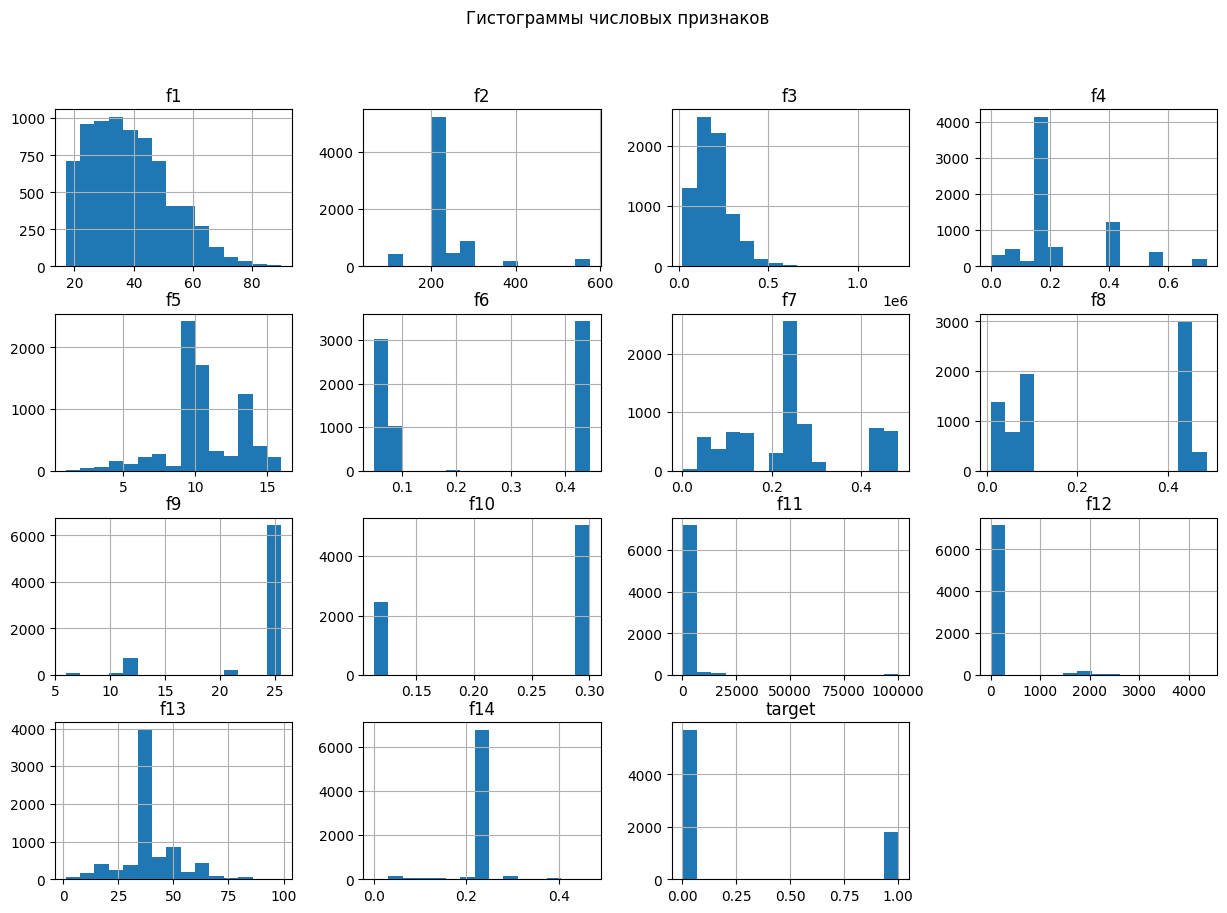

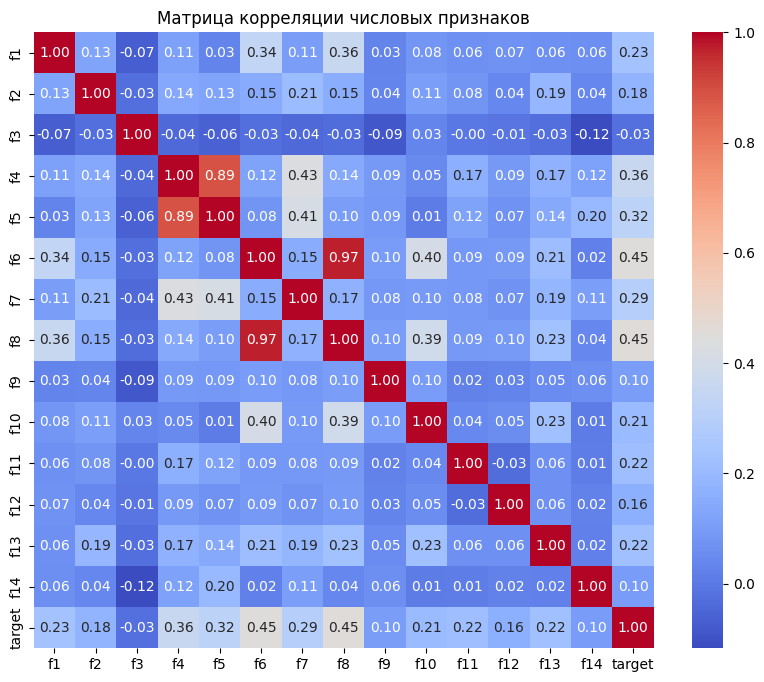

In [28]:
analyze_df(df_train)

In [49]:
df_test = pd.read_csv(path_test)
df_test

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,target
0,31,238.933333,47296,0.238933,10,0.238933,0.238933,0.238933,23.893333,0.238933,0,1740,20,0.238933,0
1,24,238.933333,33088,0.238933,7,0.238933,0.238933,0.238933,23.893333,0.238933,0,0,40,0.238933,0
2,18,238.933333,283342,0.238933,7,0.238933,0.238933,0.238933,23.893333,0.238933,0,0,20,0.238933,0
3,19,238.933333,393712,0.238933,9,0.238933,0.238933,0.238933,23.893333,0.238933,0,0,20,0.238933,0
4,28,238.933333,200515,0.238933,10,0.238933,0.238933,0.238933,23.893333,0.238933,0,0,40,0.238933,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,40,238.933333,220589,0.238933,10,0.238933,0.238933,0.238933,23.893333,0.238933,0,0,40,0.238933,1
2496,54,238.933333,165278,0.238933,10,0.238933,0.238933,0.238933,23.893333,0.238933,0,0,40,0.238933,1
2497,44,238.933333,398473,0.238933,10,0.238933,0.238933,0.238933,23.893333,0.238933,0,0,70,0.238933,1
2498,35,238.933333,183898,0.238933,11,0.238933,0.238933,0.238933,23.893333,0.238933,7298,0,50,0.238933,1


Количество столбцов: 15
Количество строк: 2500


,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,target
0,31,238.933333,47296,0.238933,10,0.238933,0.238933,0.238933,23.893333,0.238933,0,1740,20,0.238933,0
1,24,238.933333,33088,0.238933,7,0.238933,0.238933,0.238933,23.893333,0.238933,0,0,40,0.238933,0
2,18,238.933333,283342,0.238933,7,0.238933,0.238933,0.238933,23.893333,0.238933,0,0,20,0.238933,0
3,19,238.933333,393712,0.238933,9,0.238933,0.238933,0.238933,23.893333,0.238933,0,0,20,0.238933,0
4,28,238.933333,200515,0.238933,10,0.238933,0.238933,0.238933,23.893333,0.238933,0,0,40,0.238933,0


,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,target
count,2500.000000,2.500000e+03,2500.000000,2.500000e+03,2500.000000,2.500000e+03,2.500000e+03,2.500000e+03,2.500000e+03,2.500000e+03,2500.000000,2500.00000,2500.000000,2.500000e+03,2500.000000
mean,38.069200,2.389333e+02,191561.425200,2.389333e-01,10.056800,2.389333e-01,2.389333e-01,2.389333e-01,2.389333e+01,2.389333e-01,1022.667200,83.76080,40.108800,2.389333e-01,0.234800
std,13.442168,8.528219e-14,107542.508483,5.552226e-17,2.554875,5.552226e-17,5.552226e-17,5.552226e-17,3.553424e-15,5.552226e-17,6786.871929,387.72358,12.109914,5.552226e-17,0.423959
min,17.000000,2.389333e+02,19302.000000,2.389333e-01,1.000000,2.389333e-01,2.389333e-01,2.389333e-01,2.389333e+01,2.389333e-01,0.000000,0.00000,3.000000,2.389333e-01,0.000000
25%,27.000000,2.389333e+02,119098.750000,2.389333e-01,9.000000,2.389333e-01,2.389333e-01,2.389333e-01,2.389333e+01,2.389333e-01,0.000000,0.00000,38.750000,2.389333e-01,0.000000
50%,37.000000,2.389333e+02,177510.500000,2.389333e-01,10.000000,2.389333e-01,2.389333e-01,2.389333e-01,2.389333e+01,2.389333e-01,0.000000,0.00000,40.000000,2.389333e-01,0.000000
75%,47.000000,2.389333e+02,238851.250000,2.389333e-01,12.000000,2.389333e-01,2.389333e-01,2.389333e-01,2.389333e+01,2.389333e-01,0.000000,0.00000,45.000000,2.389333e-01,0.000000
max,90.000000,2.389333e+02,910398.000000,2.389333e-01,16.000000,2.389333e-01,2.389333e-01,2.389333e-01,2.389333e+01,2.389333e-01,99999.000000,2559.00000,99.000000,2.389333e-01,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      2500 non-null   int64  
 1   f2      2500 non-null   float64
 2   f3      2500 non-null   int64  
 3   f4      2500 non-null   float64
 4   f5      2500 non-null   int64  
 5   f6      2500 non-null   float64
 6   f7      2500 non-null   float64
 7   f8      2500 non-null   float64
 8   f9      2500 non-null   float64
 9   f10     2500 non-null   float64
 10  f11     2500 non-null   int64  
 11  f12     2500 non-null   int64  
 12  f13     2500 non-null   int64  
 13  f14     2500 non-null   float64
 14  target  2500 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 293.1 KB

Типы данных:
f1          int64
f2        float64
f3          int64
f4        float64
f5          int64
f6        float64
f7        float64
f8        float64
f9        float64
f10       float64
f11         int64


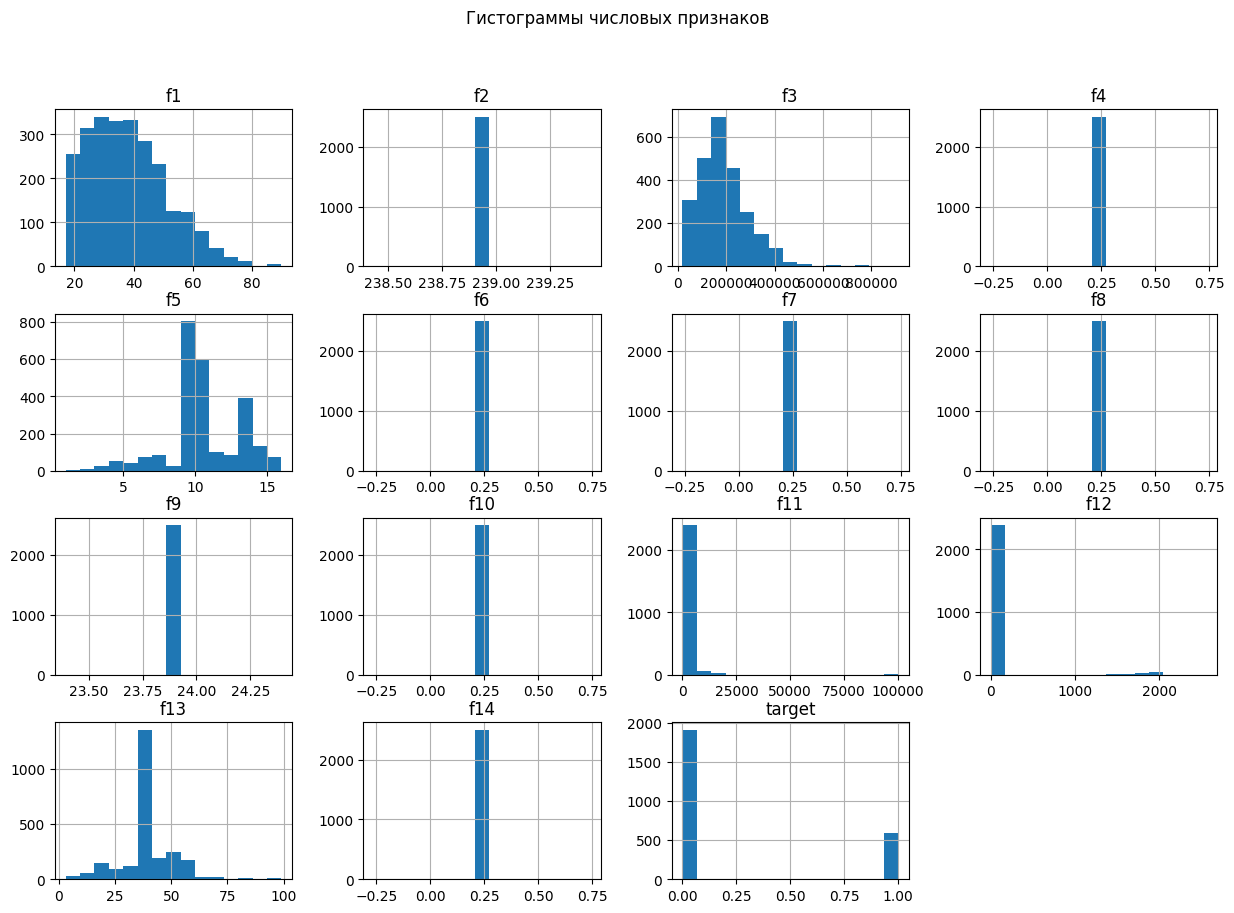

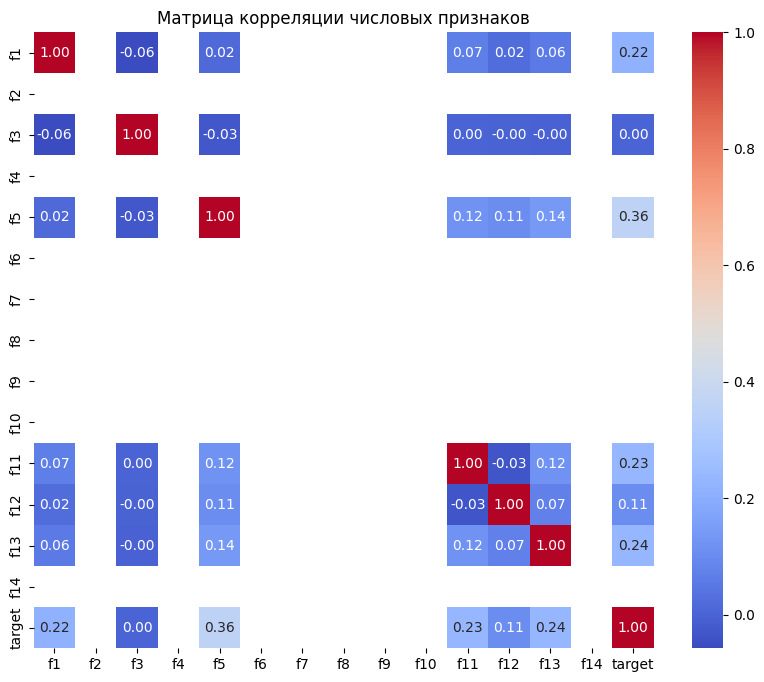

In [30]:
analyze_df(df_test)

In [31]:
df_train.fillna(df_train.median(), inplace=True)

Количество столбцов: 15
Количество строк: 2500


,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,target
0,31,238.933333,47296,0.238933,10,0.238933,0.238933,0.238933,23.893333,0.238933,0,1740,20,0.238933,0
1,24,238.933333,33088,0.238933,7,0.238933,0.238933,0.238933,23.893333,0.238933,0,0,40,0.238933,0
2,18,238.933333,283342,0.238933,7,0.238933,0.238933,0.238933,23.893333,0.238933,0,0,20,0.238933,0
3,19,238.933333,393712,0.238933,9,0.238933,0.238933,0.238933,23.893333,0.238933,0,0,20,0.238933,0
4,28,238.933333,200515,0.238933,10,0.238933,0.238933,0.238933,23.893333,0.238933,0,0,40,0.238933,0


,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,target
count,2500.000000,2.500000e+03,2500.000000,2.500000e+03,2500.000000,2.500000e+03,2.500000e+03,2.500000e+03,2.500000e+03,2.500000e+03,2500.000000,2500.00000,2500.000000,2.500000e+03,2500.000000
mean,38.069200,2.389333e+02,191561.425200,2.389333e-01,10.056800,2.389333e-01,2.389333e-01,2.389333e-01,2.389333e+01,2.389333e-01,1022.667200,83.76080,40.108800,2.389333e-01,0.234800
std,13.442168,8.528219e-14,107542.508483,5.552226e-17,2.554875,5.552226e-17,5.552226e-17,5.552226e-17,3.553424e-15,5.552226e-17,6786.871929,387.72358,12.109914,5.552226e-17,0.423959
min,17.000000,2.389333e+02,19302.000000,2.389333e-01,1.000000,2.389333e-01,2.389333e-01,2.389333e-01,2.389333e+01,2.389333e-01,0.000000,0.00000,3.000000,2.389333e-01,0.000000
25%,27.000000,2.389333e+02,119098.750000,2.389333e-01,9.000000,2.389333e-01,2.389333e-01,2.389333e-01,2.389333e+01,2.389333e-01,0.000000,0.00000,38.750000,2.389333e-01,0.000000
50%,37.000000,2.389333e+02,177510.500000,2.389333e-01,10.000000,2.389333e-01,2.389333e-01,2.389333e-01,2.389333e+01,2.389333e-01,0.000000,0.00000,40.000000,2.389333e-01,0.000000
75%,47.000000,2.389333e+02,238851.250000,2.389333e-01,12.000000,2.389333e-01,2.389333e-01,2.389333e-01,2.389333e+01,2.389333e-01,0.000000,0.00000,45.000000,2.389333e-01,0.000000
max,90.000000,2.389333e+02,910398.000000,2.389333e-01,16.000000,2.389333e-01,2.389333e-01,2.389333e-01,2.389333e+01,2.389333e-01,99999.000000,2559.00000,99.000000,2.389333e-01,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      2500 non-null   int64  
 1   f2      2500 non-null   float64
 2   f3      2500 non-null   int64  
 3   f4      2500 non-null   float64
 4   f5      2500 non-null   int64  
 5   f6      2500 non-null   float64
 6   f7      2500 non-null   float64
 7   f8      2500 non-null   float64
 8   f9      2500 non-null   float64
 9   f10     2500 non-null   float64
 10  f11     2500 non-null   int64  
 11  f12     2500 non-null   int64  
 12  f13     2500 non-null   int64  
 13  f14     2500 non-null   float64
 14  target  2500 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 293.1 KB

Типы данных:
f1          int64
f2        float64
f3          int64
f4        float64
f5          int64
f6        float64
f7        float64
f8        float64
f9        float64
f10       float64
f11         int64


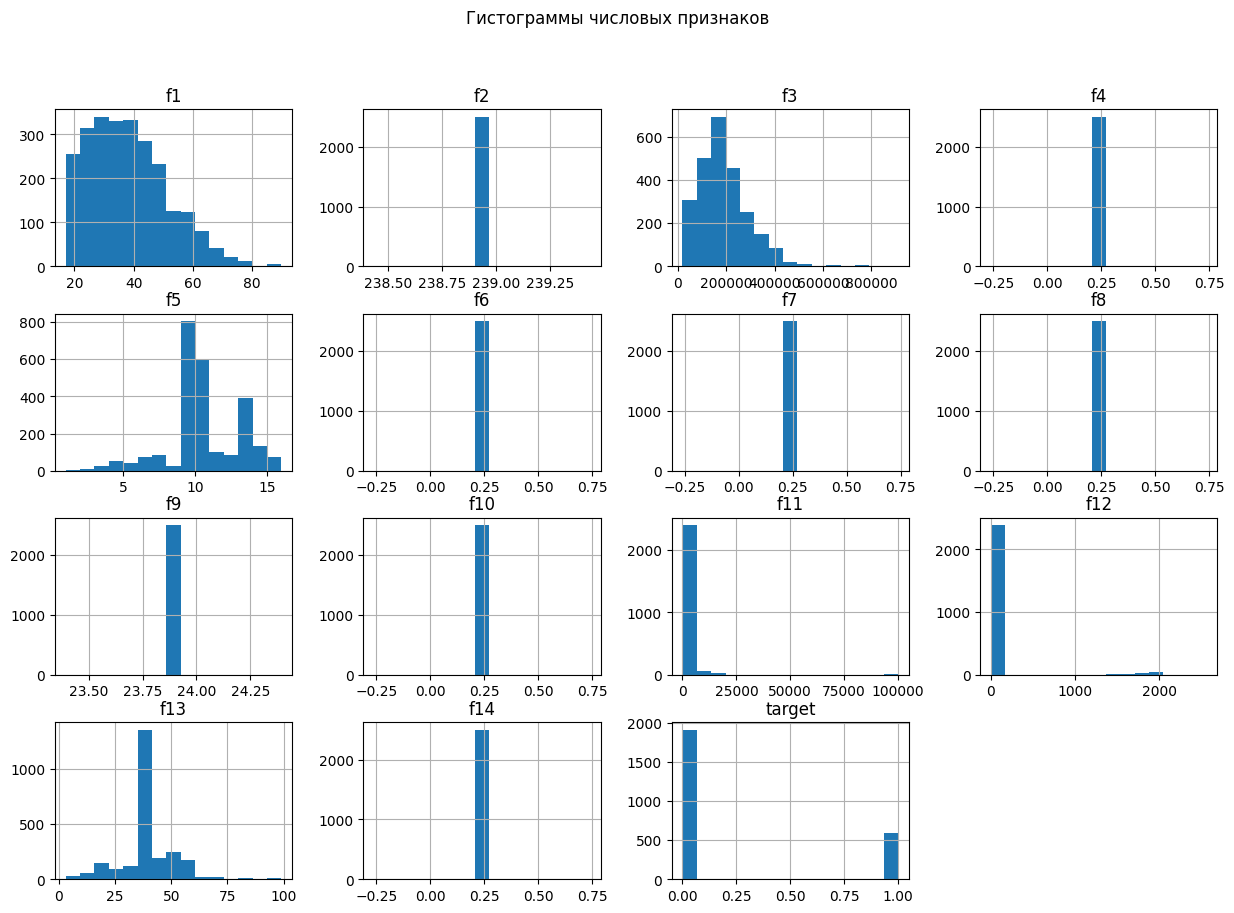

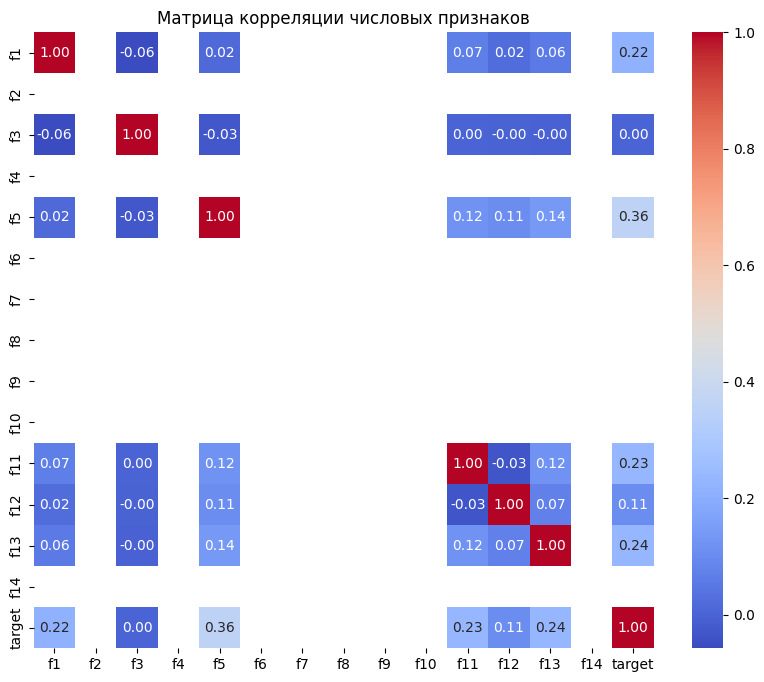

In [32]:
analyze_df(df_test)

In [33]:
df_train['target'].value_counts(normalize=True)

target
0    0.761067
1    0.238933
Name: proportion, dtype: float64

In [34]:
df_test['target'].value_counts(normalize=True)

target
0    0.7652
1    0.2348
Name: proportion, dtype: float64

## Вывод:
Распределение в двух датафреймах составляет 76 на 24 %, что свидетельствует о дисбалансе классов. Такая метрика как accuracy покажет примерный результат от 90-100% на любой модели. В связи с этим для работы с  дисбалансными классами лучше использовать следующие метрики: ROC-AUC, AUR-PR, F1-мера. Так же для работы с дисбалансными классами очень хорошо себя покажут модели с возможностью изменять веса в классах, либо если это не предполагает задание, то можно использовать дублирование меньшего класса для того что бы повысить его значимость для модели, но при таком варианте есть проблема переобучение модели, так как дублированный класс не будет нести прогнозную способность.
В нашем варианте мы остановимся на ансамбливых моделях и f1- мере.

## 3. Постройте baseline-модель:
1. 
разбейте TrainData на тренировочные (Train) и тестовые данные (Test)
;2. 
обучите LogisticRegression и SVC с параметрами по умолчанию на тренировочных данных (Train
)3. ;
примените модели на тестовых данных (Test).

Baseline-модель — это простейшая модель, используемая в машинном обучении для установления отправной точки или базового уровня производительности. Она служит стандартом, с которым сравниваются более сложные модели. Обычно baseline-модель использует простые правила или статистические методы, такие как прогнозирование среднего значения, медианы или выбор самой частой категории в задачах классификации. Это позволяет оценить, насколько сложная модель улучшает результат по сравнению с базовым уровнем.

In [35]:
# Следую определению построим стартовую модель
df_train['target'].value_counts()

target
0    5708
1    1792
Name: count, dtype: int64

In [36]:
df_test['target'].value_counts()

target
0    1913
1     587
Name: count, dtype: int64

In [37]:
baseline_train = (1792/7500)*100
baseline_train

23.893333333333334

In [38]:
baseline_test = (587/2500)*100
baseline_test

23.48

## 4. Улучшите модели
Попробуйте улучшить качество обученных моделей:

можете задавать class_weights;
можете изменять параметры модели;
можете вручную или при помощи методов Python генерировать новые признаки и/или удалять существующие.
Это самая важная и творческая часть задания. Проводите как можно больше экспериментов!

Проведите минимиум три эксперимента: для каждого типа модели минимум один эксперимент.

In [39]:
# Разделение данных на обучающие и тестовые
X = df_train.drop("target", axis=1) 
y = df_train["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
# Создание модели случайного леса с балансировкой весов классов
model = RandomForestClassifier(class_weight='balanced', random_state=42)

In [41]:
# Обучение модели
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [42]:
# Предсказание
y_pred = model.predict(X_test)

# Оценка модели
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      1158
           1       0.68      0.61      0.64       342

    accuracy                           0.85      1500
   macro avg       0.78      0.76      0.77      1500
weighted avg       0.84      0.85      0.84      1500



## разберем метрики детально:

1. **Precision (точность)**:
   - Для класса `0`: 0.89 (из всех предсказанных положительных случаев класса `0`, 89% были верными).
   - Для класса `1`: 0.68 (из всех предсказанных положительных случаев класса `1`, 68% были верными).
   
2. **Recall (полнота)**:
   - Для класса `0`: 0.91 (91% всех реальных случаев класса `0` были правильно предсказаны).
   - Для класса `1`: 0.61 (61% всех реальных случаев класса `1` были правильно предсказаны).

3. **F1-score**:
   - Для класса `0`: 0.90 (сбалансированная метрика между точностью и полнотой).
   - Для класса `1`: 0.64 (даёт общее представление о качестве для менее представленного класса).

4. **Accuracy (точность по всем классам)**: 0.85 (все случаи, которые модель предсказала правильно).

5. **Macro Avg**:
   - Средние значения Precision, Recall и F1-score для всех классов без учета их количества.

6. **Weighted Avg**:
   - Средние значения Precision, Recall и F1-score для всех классов, взвешенные по количеству примеров в каждом классе.

**Интерпретация**:
- Модель хорошо справляется с классом `0`, но испытывает трудности с классом `1`, что типично для дисбаланса классов.
- F1-score для класса `1` ниже, что указывает на возможную нижнюю удовлетворенность в уальтернативные алгоритмы.

In [43]:
# Добавим гипер параметры для модели
model_2 = RandomForestClassifier(class_weight='balanced', random_state=42, n_estimators=100, max_depth=5)

In [44]:
# Обучаем модель
model_2.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5, random_state=42)

In [45]:
# Предсказание
y_pred = model_2.predict(X_test)

# Оценка модели
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.72      0.82      1158
           1       0.49      0.90      0.63       342

    accuracy                           0.76      1500
   macro avg       0.72      0.81      0.73      1500
weighted avg       0.85      0.76      0.78      1500



# новые результаты:

1. **Precision (точность)**:
   - Для класса `0`: 0.96 (высокая точность означает, что большинство предсказанных положительных для `0` были верны).
   - Для класса `1`: 0.49 (низкая точность, поэтому много ложных положительных).

2. **Recall (полнота)**:
   - Для класса `0`: 0.72 (многие истинные случаи `0` предсказаны неверно).
   - Для класса `1`: 0.90 (хорошо удерживает класс `1`, то есть большинство случаев `1` правильно предсказаны).

3. **F1-score**:
   - Для класса `0`: 0.82 (сбалансированность между точностью и полнотой, хотя и упала из-за низкой полноты).
   - Для класса `1`: 0.63 (компромисс между точностью и полнотой; более сбалансированный, но всё ещё можно улучшать).

4. **Accuracy (общая точность)**: 0.76 (неплохой процент правильно предсказанных примеров).

5. **Macro Avg**:
   - Указывает на общую оценку балансировки классов, но не учитывает их количество.

6. **Weighted Avg**:
   - Обобщает модели лучше, взвешивая оценки по размеру классов.

**Анализ**:
- Модель улучшилась в распознавании класса `1`, но за счёт увеличения ложных срабатываний для `0`.
- Возможно, нужно ещё тюнинговать модель или экспериментировать сшения производительности.

In [46]:
# Масштабирование данных
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [47]:
# Балансировка с помощью SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [48]:
# Создание нескольких моделей
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
log_reg = LogisticRegression(class_weight='balanced', random_state=42)

NameError: name 'XGBClassifier' is not defined

In [54]:
# Ансамбль моделей с использованием голосования
voting_clf = VotingClassifier(
    estimators=[('rf', model), ('xgb', xgb), ('log_reg', log_reg)],
    voting='soft'
)

In [57]:
# Обучение ансамблевой модели
voting_clf.fit(X_train_balanced, y_train_balanced)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(class_weight='balanced',
                                                     random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='logloss',
                                            feature_types=None, gamma=None,
                                            gr...
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                             ('log_reg',
                              LogisticRegression(class_weight='balanced',
                                                 random_state=42))],
                 voting='soft')

In [58]:
# Предсказание
y_pred = voting_clf.predict(X_test)

# Оценка модели
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1158
           1       0.67      0.67      0.67       342

    accuracy                           0.85      1500
   macro avg       0.78      0.79      0.79      1500
weighted avg       0.85      0.85      0.85      1500



### новые результаты показывают улучшение по сравнению с предыдущими.

1. **Precision (точность)**:
   - Для класса `0`: 0.90 (высокая точность, большинство предсказанных случаев для `0` верны).
   - Для класса `1`: 0.67 (увеличение точности по сравнению с предыдущими результатами).

2. **Recall (полнота)**:
   - Для класса `0`: 0.90 (хорошая полнота, большинство истинных случаев для `0` обнаружены).
   - Для класса `1`: 0.67 (улучшенная полнота для класса `1`, многие случаи предсказаны правильно).

3. **F1-score**:
   - Для класса `0`: 0.90 (хороший баланс между точностью и полнотой).
   - Для класса `1`: 0.67 (увеличивается сбалансированность между точностью и полнотой).

4. **Accuracy (общая точность)**: 0.85 (хороший процент правильно предсказанных примеров).

5. **Macro Avg**:
   - Средние показатели между классами слегка улучшены, что говорит о лучшем балансе.

6. **Weighted Avg**:
   - Обобщает производительность, учитывая размер каждого класса, и показывает стабильно хорошее значение.

**Анализ**:
- Ансамблевой метод и балансировка помогли улучшить общую производительность.
- Класс `1` еще может нуждаться в дальнейшей настройке, чтобы поднять его точность и полноту чуть выше.
- Однако, результаты уже значительно более сбалансированы, что указывает на общее улучшение модели.